In [1]:
import pandas as pd

In [2]:
PATH = "ENB2012_data_Energy_efficiency.csv"
df = pd.read_csv(PATH)

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [4]:
df=df.drop(columns=['Unnamed: 10', 'Unnamed: 11','Y2'])

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84


In [6]:
df.dropna(inplace=True)
df['X1'].values

array([0.98, 0.98, 0.98, 0.98, 0.9 , 0.9 , 0.9 , 0.9 , 0.86, 0.86, 0.86,
       0.86, 0.82, 0.82, 0.82, 0.82, 0.79, 0.79, 0.79, 0.79, 0.76, 0.76,
       0.76, 0.76, 0.74, 0.74, 0.74, 0.74, 0.71, 0.71, 0.71, 0.71, 0.69,
       0.69, 0.69, 0.69, 0.66, 0.66, 0.66, 0.66, 0.64, 0.64, 0.64, 0.64,
       0.62, 0.62, 0.62, 0.62, 0.98, 0.98, 0.98, 0.98, 0.9 , 0.9 , 0.9 ,
       0.9 , 0.86, 0.86, 0.86, 0.86, 0.82, 0.82, 0.82, 0.82, 0.79, 0.79,
       0.79, 0.79, 0.76, 0.76, 0.76, 0.76, 0.74, 0.74, 0.74, 0.74, 0.71,
       0.71, 0.71, 0.71, 0.69, 0.69, 0.69, 0.69, 0.66, 0.66, 0.66, 0.66,
       0.64, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.62, 0.98, 0.98, 0.98,
       0.98, 0.9 , 0.9 , 0.9 , 0.9 , 0.86, 0.86, 0.86, 0.86, 0.82, 0.82,
       0.82, 0.82, 0.79, 0.79, 0.79, 0.79, 0.76, 0.76, 0.76, 0.76, 0.74,
       0.74, 0.74, 0.74, 0.71, 0.71, 0.71, 0.71, 0.69, 0.69, 0.69, 0.69,
       0.66, 0.66, 0.66, 0.66, 0.64, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62,
       0.62, 0.98, 0.98, 0.98, 0.98, 0.9 , 0.9 , 0.

In [7]:
y_col = 'Y1'

#Split x and y
feature_cols = [x for x in df.columns if x!= y_col]
x_data = df[feature_cols]
y_data = df[y_col]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
#Error Storage
error_df = []

LR = LR.fit(x_train_scaled,y_train)
y_train_pred = LR.predict(x_train_scaled)
y_test_pred = LR.predict(x_test_scaled)

error_df.append(pd.Series({"train":mean_squared_error(y_train, y_train_pred),
                            "test": mean_squared_error(y_test_pred,y_test)},
                             name='Error'))

error_df

[train    9.018014
 test     7.692564
 Name: Error, dtype: float64]

MSE: 7.692563589015151


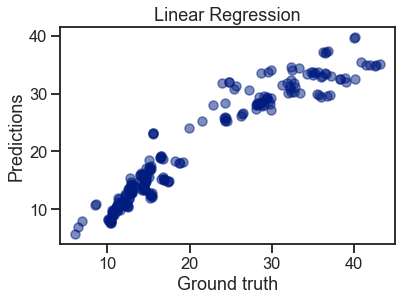

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
ax.scatter(y_test, y_test_pred, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Linear Regression')

print("MSE: {}".format(mean_squared_error(y_test,y_test_pred)))

MSE: 0.18781887624544122


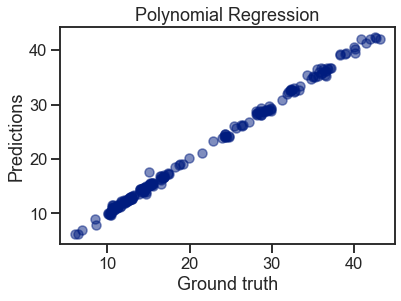

In [44]:
from sklearn.preprocessing import PolynomialFeatures
degree = 4
pf = PolynomialFeatures(degree)
lr_poly = LinearRegression()

x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.transform(x_test)

lr_poly = lr_poly.fit(x_train_poly, y_train)
y_test_poly_pred = lr_poly.predict(x_test_poly)

ax = plt.axes()
ax.scatter(y_test, y_test_poly_pred, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Polynomial Regression')
print("MSE: {}".format(mean_squared_error(y_test,y_test_poly_pred)))


MSE: 0.4293709749513026


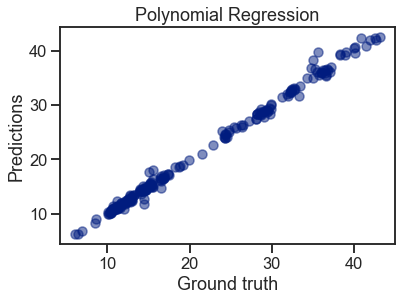

In [43]:
import warnings
warnings.filterwarnings('ignore', module = 'sklearn')


from sklearn.linear_model import Ridge, Lasso
degree = 12
pf = PolynomialFeatures(degree)
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.transform(x_test)

#Ridge Regression
scaler = MinMaxScaler()
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_test_poly_scaled = scaler.transform(x_test_poly)

rr = Ridge(alpha=0.001)
rr= rr.fit(x_train_poly_scaled, y_train)
y_pred_rr = rr.predict(x_test_poly_scaled)

ax = plt.axes()
ax.scatter(y_test, y_pred_rr, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Polynomial Regression')
print("MSE: {}".format(mean_squared_error(y_test,y_pred_rr)))

MSE: 0.4550715360593278


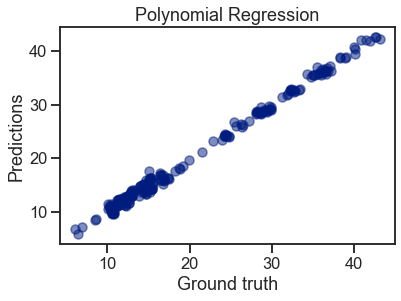

In [36]:
#Lasso

lassor = Lasso(alpha=0.0001)
lassor= lassor.fit(x_train_poly_scaled, y_train)
y_pred_lassor = lassor.predict(x_test_poly_scaled)

ax = plt.axes()
ax.scatter(y_test, y_pred_lassor, alpha=.5)
ax.set(xlabel = 'Ground truth',
      ylabel = 'Predictions',
      title = 'Polynomial Regression')
print("MSE: {}".format(mean_squared_error(y_test,y_pred_lassor)))